In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt

In [78]:
PATH = "./file.csv"
dataFrame = pd.read_csv(PATH)
dataFrame = dataFrame.drop(['Unnamed: 0'], axis=1)
dataFrame.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [79]:
dataFrame.shape

(463, 19)

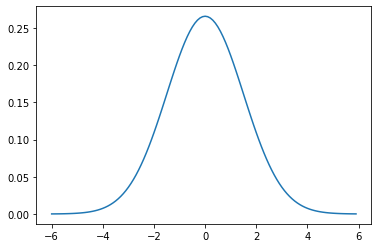

In [80]:
from scipy.stats import norm

# Plot between -6 and 6 with 0.1 steps.
x_axis = np.arange(-6, 6, 0.1)

# Mean = 0, SD = 1.5
plt.plot(x_axis, norm.pdf(x_axis, 0, 1.5))
plt.show()

In [81]:
eval_mean = round(dataFrame['eval'].mean(), 3)
eval_sd = round(dataFrame['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


In [82]:
prob0 = scipy.stats.norm.cdf((4 - eval_mean)/eval_sd)
print(1 - prob0)

0.49856237327221


Question 1: what is the probability of receiving an evaluation score greater than 3.5 and less than 4.2?

In [84]:
prob1 = scipy.stats.norm.cdf((3.5 - eval_mean)/eval_sd)
prob2 = scipy.stats.norm.cdf((eval_mean - 4.2)/eval_sd)
print(1 - (prob1+prob2))

0.45727739131753053


Question 2: what is the probability of receiving an evaluation score greater than 3.3?

In [85]:
prob3 = scipy.stats.norm.cdf((3.3 - eval_mean)/eval_sd)
print(1 - prob3)

0.8957422041794154


Question 3: what is the probability of receiving an evaluation score between 2 and 3?

In [86]:
prob4 = scipy.stats.norm.cdf((eval_mean - 3)/eval_sd)
prob5 = scipy.stats.norm.cdf((2 - eval_mean)/eval_sd)
print(1-(prob4+prob5))

0.035913693912466016


Question 4: To test the hypothesis that sleeping for at least 8 hours makes one smarter, 12 people who have slept for at least 8 hours every day for the past one year have their IQ tested.

Here are the results: 116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92

Test using the following hypotheses: H0: μ = 100 or Ha: μ > 100

In [87]:
# using formula
result = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
z = (np.mean(result)-100)/(np.std(result)/sqrt(12))
print("Z is : " + str(z))

Z is : 2.4580394711961078


Question 5: Consider a computer system with Poisson job-arrival stream at an average of 2 per minute. Determine the probability that in any one-minute interval there will be

1) 0 jobs;

2) exactly 2 jobs;

3) at most 3 arrivals.

In [89]:
from scipy.stats import poisson
# 0 jobs
p1 = poisson.pmf(0, 2)
print("0 jobs : "+str(p1))
# exactly 2 jobs
p2 = poisson.pmf(2, 2)
print("exactly 2 jobs : "+str(p2))
# at most 3 arrivals
p3 = poisson.cdf(3, 2)
print("at most 3 arrivals : "+str(p3))

0 jobs : 0.1353352832366127
exactly 2 jobs : 0.2706705664732254
at most 3 arrivals : 0.857123460498547
